In [1]:
! codecarbon init


Welcome to CodeCarbon, here is your experiment id:
f75c09b5-77b7-4240-9ebc-f1832e011a3a (from ./.codecarbon.config)



In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import torch
import numpy as np
import pandas as pd

In [3]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
tracker.start()
reg = LinearRegression().fit(X, y)
tracker.stop()
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[3, 5]])))


[codecarbon INFO @ 17:57:14] [setup] RAM Tracking...
[codecarbon INFO @ 17:57:14] [setup] GPU Tracking...
[codecarbon INFO @ 17:57:14] No GPU found.
[codecarbon INFO @ 17:57:14] [setup] CPU Tracking...
[codecarbon INFO @ 17:57:14] Tracking Intel CPU via Power Gadget
[codecarbon INFO @ 17:57:16] >>> Tracker's metadata:
[codecarbon INFO @ 17:57:16]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 17:57:16]   Python version: 3.8.13
[codecarbon INFO @ 17:57:16]   Available RAM : 8.000 GB
[codecarbon INFO @ 17:57:16]   CPU count: 8
[codecarbon INFO @ 17:57:16]   CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
[codecarbon INFO @ 17:57:16]   GPU count: None
[codecarbon INFO @ 17:57:16]   GPU model: None
[codecarbon INFO @ 17:57:19] Energy consumed for RAM : 0.000000 kWh. RAM Power : 3.0 W


1.0
[1. 2.]
3.0000000000000018
[16.]


[codecarbon INFO @ 17:57:20] Energy consumed for all CPUs : 0.000000 kWh. All CPUs Power : 4.3029166666666665 W
[codecarbon INFO @ 17:57:22] 0.000000 kWh of electricity used since the begining.


1.5062303491785178e-09

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [945.4992184]
Mean squared error: 3471.92
Coefficient of determination: 0.41


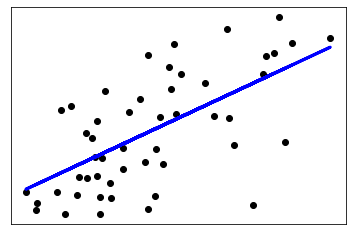

In [27]:
tracker.start()
X = np.random.randn(10000, 10000)
y = np.random.randn(10000)
reg = LinearRegression().fit(X, y)
tracker.stop()

In [15]:
df = pd.read_csv("intel_power_gadget_log.csv")

In [9]:
df.iloc[0:12]

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,17:57:21:210,1.460765e+12,0.103,16.447,1385.0,1100.0,2000.0,1386.0,3.560,0.366,...,73.0,0.0,71.0,73.0,1.100,0.113,0.031,15.0,0.0,0.0
1,17:57:21:325,1.460925e+12,0.218,13.028,1382.0,1100.0,2000.0,1392.0,2.924,0.703,...,72.0,0.0,70.0,72.0,0.914,0.218,0.061,15.0,0.0,0.0
2,17:57:21:431,1.461074e+12,0.324,13.455,1889.0,1100.0,3300.0,1926.0,4.237,1.154,...,73.0,0.0,70.0,76.0,0.992,0.324,0.090,15.0,0.0,0.0
3,17:57:21:538,1.461222e+12,0.431,10.116,1272.0,1100.0,2800.0,1250.0,2.230,1.392,...,72.0,0.0,70.0,73.0,0.831,0.413,0.115,15.0,0.0,0.0
4,17:57:21:648,1.461375e+12,0.541,10.236,1343.0,1100.0,1700.0,1347.0,2.616,1.679,...,72.0,0.0,70.0,72.0,0.972,0.519,0.144,15.0,0.0,0.0
5,17:57:21:757,1.461526e+12,0.650,9.638,1272.0,1100.0,1700.0,1282.0,2.163,1.914,...,72.0,0.0,70.0,72.0,0.742,0.600,0.167,15.0,0.0,0.0
6,17:57:21:865,1.461677e+12,0.758,9.579,1239.0,1100.0,1700.0,1246.0,2.159,2.148,...,72.0,0.0,70.0,72.0,0.737,0.680,0.189,15.0,0.0,0.0
7,17:57:21:974,1.461829e+12,0.867,12.228,1235.0,1100.0,1700.0,1236.0,2.309,2.400,...,72.0,0.0,70.0,72.0,0.709,0.757,0.210,15.0,0.0,0.0
8,17:57:22:081,1.461978e+12,0.974,14.491,1320.0,1100.0,1700.0,1334.0,2.733,2.693,...,72.0,0.0,70.0,72.0,0.862,0.850,0.236,15.0,500.0,500.0
9,17:57:22:190,1.462129e+12,1.083,8.908,1312.0,1100.0,1700.0,1317.0,2.095,2.920,...,72.0,0.0,69.0,72.0,0.639,0.919,0.255,15.0,0.0,0.0


In [10]:
df.columns

Index(['System Time', 'RDTSC', 'Elapsed Time (sec)', 'CPU Utilization(%)',
       'CPU Frequency_0(MHz)', 'CPU Min Frequency_0(MHz)',
       'CPU Max Frequency_0(MHz)', 'CPU Requsted Frequency_0(MHz)',
       'Processor Power_0(Watt)', 'Cumulative Processor Energy_0(Joules)',
       'Cumulative Processor Energy_0(mWh)', 'IA Power_0(Watt)',
       'Cumulative IA Energy_0(Joules)', 'Cumulative IA Energy_0(mWh)',
       'Package Temperature_0(C)', 'Package Hot_0', 'CPU Min Temperature_0(C)',
       'CPU Max Temperature_0(C)', 'DRAM Power_0(Watt)',
       'Cumulative DRAM Energy_0(Joules)', 'Cumulative DRAM Energy_0(mWh)',
       'Package Power Limit_0(Watt)', 'GT Frequency(MHz)',
       'GT Requsted Frequency(MHz)'],
      dtype='object')

In [19]:
type(df.iloc[0,0])

str

In [13]:
df['System Time'] = df['System Time'].apply(lambda x: pd.to_datetime(x, errors = 'coerce'))

In [14]:
df

,System Time,RDTSC,Elapsed Time (sec),CPU Utilization(%),CPU Frequency_0(MHz),CPU Min Frequency_0(MHz),CPU Max Frequency_0(MHz),CPU Requsted Frequency_0(MHz),Processor Power_0(Watt),Cumulative Processor Energy_0(Joules),...,Package Temperature_0(C),Package Hot_0,CPU Min Temperature_0(C),CPU Max Temperature_0(C),DRAM Power_0(Watt),Cumulative DRAM Energy_0(Joules),Cumulative DRAM Energy_0(mWh),Package Power Limit_0(Watt),GT Frequency(MHz),GT Requsted Frequency(MHz)
0,NaT,1.460765e+12,0.103,16.447,1385.0,1100.0,2000.0,1386.0,3.560,0.366,...,73.0,0.0,71.0,73.0,1.100,0.113,0.031,15.0,0.0,0.0
1,NaT,1.460925e+12,0.218,13.028,1382.0,1100.0,2000.0,1392.0,2.924,0.703,...,72.0,0.0,70.0,72.0,0.914,0.218,0.061,15.0,0.0,0.0
2,NaT,1.461074e+12,0.324,13.455,1889.0,1100.0,3300.0,1926.0,4.237,1.154,...,73.0,0.0,70.0,76.0,0.992,0.324,0.090,15.0,0.0,0.0
3,NaT,1.461222e+12,0.431,10.116,1272.0,1100.0,2800.0,1250.0,2.230,1.392,...,72.0,0.0,70.0,73.0,0.831,0.413,0.115,15.0,0.0,0.0
4,NaT,1.461375e+12,0.541,10.236,1343.0,1100.0,1700.0,1347.0,2.616,1.679,...,72.0,0.0,70.0,72.0,0.972,0.519,0.144,15.0,0.0,0.0
5,NaT,1.461526e+12,0.650,9.638,1272.0,1100.0,1700.0,1282.0,2.163,1.914,...,72.0,0.0,70.0,72.0,0.742,0.600,0.167,15.0,0.0,0.0
6,NaT,1.461677e+12,0.758,9.579,1239.0,1100.0,1700.0,1246.0,2.159,2.148,...,72.0,0.0,70.0,72.0,0.737,0.680,0.189,15.0,0.0,0.0
7,NaT,1.461829e+12,0.867,12.228,1235.0,1100.0,1700.0,1236.0,2.309,2.400,...,72.0,0.0,70.0,72.0,0.709,0.757,0.210,15.0,0.0,0.0
8,NaT,1.461978e+12,0.974,14.491,1320.0,1100.0,1700.0,1334.0,2.733,2.693,...,72.0,0.0,70.0,72.0,0.862,0.850,0.236,15.0,500.0,500.0
9,NaT,1.462129e+12,1.083,8.908,1312.0,1100.0,1700.0,1317.0,2.095,2.920,...,72.0,0.0,69.0,72.0,0.639,0.919,0.255,15.0,0.0,0.0


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

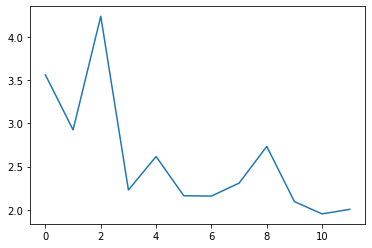

In [23]:
plt.plot(df['Processor Power_0(Watt)'])